# 🧪 Parcial – Métodos Predictivos
Completa las celdas con `TODO` y ejecuta `Runtime → Run all` antes de entregar.

## 🎯 Instrucciones Generales
- Este parcial está dividido en dos partes: teoría (40 pts) y práctica (60 pts).
- Documenta claramente tu código y explica tus respuestas en celdas Markdown.
- Al finalizar, exporta el notebook a PDF y entrega también tus 5 slides con visualizaciones clave.


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* La variable objetivo es aquella que buscamos predecir; en este dataset yo diría que puede ser algo como si votó o no.


#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:* EDA,PRE-PROCESAMIENTO,MODELADO,EVALUACIÓN,INSIGHT DE NEGOCIO


#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* Personalmente priorizaría la AUC-ROC ya que mide la capacidad del modelo para distinguir entre clases. Un valor más alto indica un mejor rendimiento.


#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* Esto es cuando el modelo se aprende tan bien los patrones de entrenamiento que se vuelve malo generalizand, lo podeos ver cuando en entrenamiento es muy bueno y a la hora de test en malo.


#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* K-means es un algoritmo de clustering porque agrupa los datos en k clústeres.


#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* Es cuantitativa ya que la regresión busca predecir valores numéricos.


#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* 1) Tokenización: Este proceso divide un texto en unidades más pequeñas llamadas "tokens". Estos tokens suelen ser palabras, pero también pueden ser caracteres. 2) Eliminación de Stop Words: Las "stop words" son palabras comunes en un idioma (como "el", "la", "un", "una", "y", "o", etc.) que generalmente no aportan mucho significado al análisis de texto. Eliminarlas ayuda a reducir el ruido y a centrarse en las palabras más relevantes.


#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* El parámetro k representa el número de clusters en los que quieres agrupar tus datos, es un valor que debemos especificar antes de ejecutar el algoritmo. Un k muy grande puede llevar a un sobreajuste (overfitting) en el contexto del clustering, donde los grupos identificados no representan patrones significativos o generalizables en los datos.


#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* Es una representación numérica de texto en un espacio de baja dimensión, es como convertir palabras en una lista de números.

La utilidad principal de los embeddings es capturar el significado y las relaciones entre las palabras, las palabras con significados similares o que aparecen en contextos parecidos estarán más cerca en este espacio; permitiendo que los modelos comprendan mejor el lenguaje, ya que pueden trabajar con estas representaciones numéricas en lugar de con el texto crudo.


## 💻 Parte B – Práctica (60 pts)
### 1. Setup


In [1]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip

--2025-06-04 21:39:11--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-04 21:39:11--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip’

amazon.csv.zip      100%[===================>]   1.95M  --.-KB/s    in 0.07s   

In [2]:
!unzip amazon.csv.zip

Archive:  amazon.csv.zip
  inflating: amazon.csv              


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga de datos

In [4]:
# Reemplaza con la ruta correcta de tu archivo CSV si lo subes a Colab
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Crear la columna 'text' a partir de 'review_content'
df['text'] = df['review_content']

# Limpieza de 'rating'
df['rating'] = df['rating'].str.replace(',', '.', regex=False).str.strip()
# Reemplazar 'Install the Amazon app to reduce footprint' con un valor que se pueda convertir a float, por ejemplo, NaN
df['rating'] = df['rating'].replace('Install the Amazon app to reduce footprint', np.nan)
# Use errors='coerce' to turn any remaining non-numeric values into NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'] = df['rating'].astype(float)


# Limpieza de 'discounted_price'
df['discounted_price'] = df['discounted_price'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['discounted_price'] = df['discounted_price'].replace('₹', '', regex=True).astype(float)

# Limpieza de 'actual_price'
df['actual_price'] = df['actual_price'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['actual_price'] = df['actual_price'].replace('₹', '', regex=True).astype(float)

# Crear la variable 'positive' donde rating sea mayor o igual a 4
df['positive'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

# Limpieza de 'discount_percentage'
df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)

display(df.head())

### 3. Limpieza y Feature Engineering


*   Tome `review_content` para crear una columna text

*   Haga una limpieza de rating:
```
df['col'] = df['col'].str.replace(',', '.').str.strip()
df['col'] = df['col'].str.replace('|', '0').str.strip()
df['col'] = df['col'].astype(float)
```
*   Haga una limpieza de `discounted_price`


```
  df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
  df['col'] = df['col'].replace('₹', '', regex=True).astype(float)
```



*   Haga una limpieza de `actual_price`

```
df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['col'] = df['col'].replace('₹', '', regex=True)
df['col'] = df['col'].astype(float)
```


*   Cree la variable `positive` donde `ranting` se mayor a 4:
```
df['col1'] = df['col2'].apply(lambda x: 1 if x >= 4 else 0)
```

*   Con `discount_percentage` donde `ranting` se mayor a 4:
```
df['col'] = df['col'].replace('%', '', regex=True).astype(float)
```

In [6]:
df['text'] = df['review_content']

In [8]:
df['rating'] = df['rating'].str.replace(',', '.').str.strip()
df['rating'] = df['rating'].str.replace('|', '0').str.strip()
df['rating'] = df['rating'].astype(float)

In [9]:
  df['discounted_price'] = df['discounted_price'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
  df['discounted_price'] = df['discounted_price'].replace('₹', '', regex=True).astype(float)

In [11]:
df['actual_price'] = df['actual_price'].str.replace('.', '', regex=False)
df['actual_price'] = df['actual_price'].replace('₹', '', regex=True).astype(float)

In [12]:
df['positive'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

In [14]:
df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)

In [15]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,text,positive
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Looks durable Charging is fine tooNo complains...,1
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,I ordered this cable to connect my phone to An...,1
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Not quite durable and sturdy,https://m.media-a...",0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,long wire,Charges good,Nice,I bou...",1
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,"Bought this instead of original apple, does th...",1


### 4. Análisis Exploratorio de Datos (EDA)

In [16]:
df.shape

(1465, 18)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [18]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,positive
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,461.755939,5827.899659,47.691468,4.093788,0.757679
std,3758.381683,15755.694899,21.635905,0.310598,0.428634
min,1.043000,39.000000,0.000000,0.000000,0.000000
25%,2.999000,825.000000,32.000000,4.000000,1.000000
50%,154.000000,1690.000000,50.000000,4.100000,1.000000
75%,399.000000,4400.000000,63.000000,4.300000,1.000000
max,99806.000000,433296.000000,94.000000,5.000000,1.000000


In [19]:
df.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


## Realize dos WorldClouds uno con reviews positivos y otro con negativos y haga un grafico de barras comaparado por los 10 mas comunes.

In [22]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [23]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stopwords.words('english')]
    return palabras

def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)

In [24]:
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

In [25]:
reseñas_positivas = df[df['positive'] == 1]['text'].str.cat(sep=' ')
reseñas_negativas = df[df['positive'] == 0]['text'].str.cat(sep=' ')

In [26]:
conteo_positivas = contar_palabras(reseñas_positivas)
conteo_negativas = contar_palabras(reseñas_negativas)

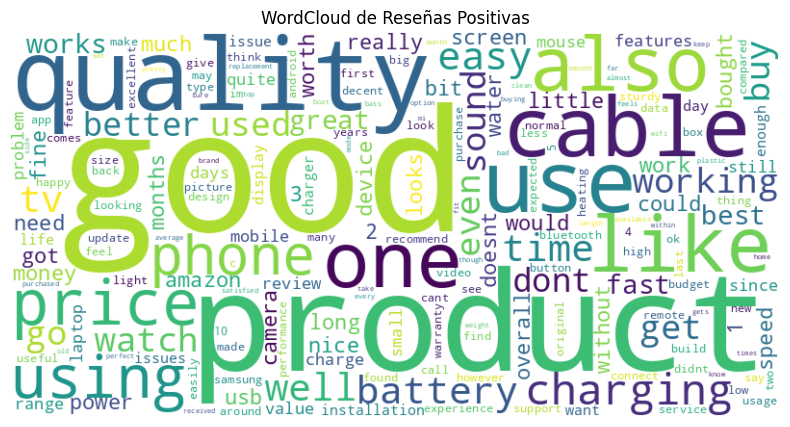

In [27]:
wordcloud_positivas = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conteo_positivas)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positivas, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de Reseñas Positivas')
plt.show()

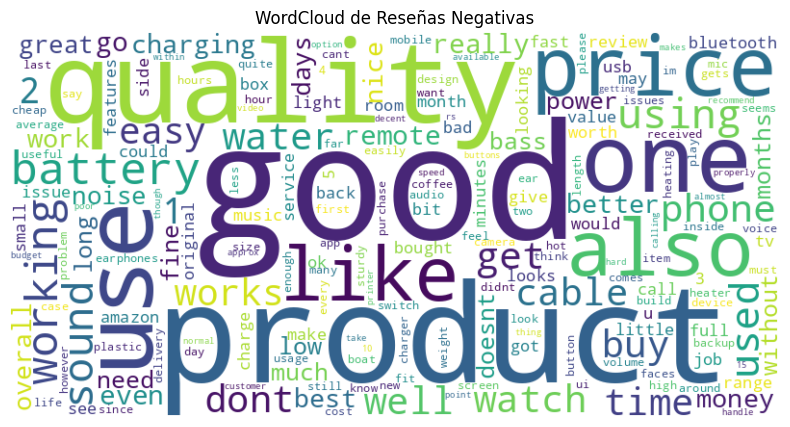

In [28]:
wordcloud_negativas = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conteo_negativas)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negativas, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de Reseñas Negativas')
plt.show()

In [29]:
top10_positivas = conteo_positivas.most_common(10)
top10_negativas = conteo_negativas.most_common(10)

In [31]:
df_top10 = pd.DataFrame({
    'Palabra': [palabra for palabra, _ in top10_positivas] + [palabra for palabra, _ in top10_negativas],
    'Frecuencia': [frecuencia for _, frecuencia in top10_positivas] + [frecuencia for _, frecuencia in top10_negativas],
    'Sentimiento': ['Positivo'] * len(top10_positivas) + ['Negativo'] * len(top10_negativas)
})

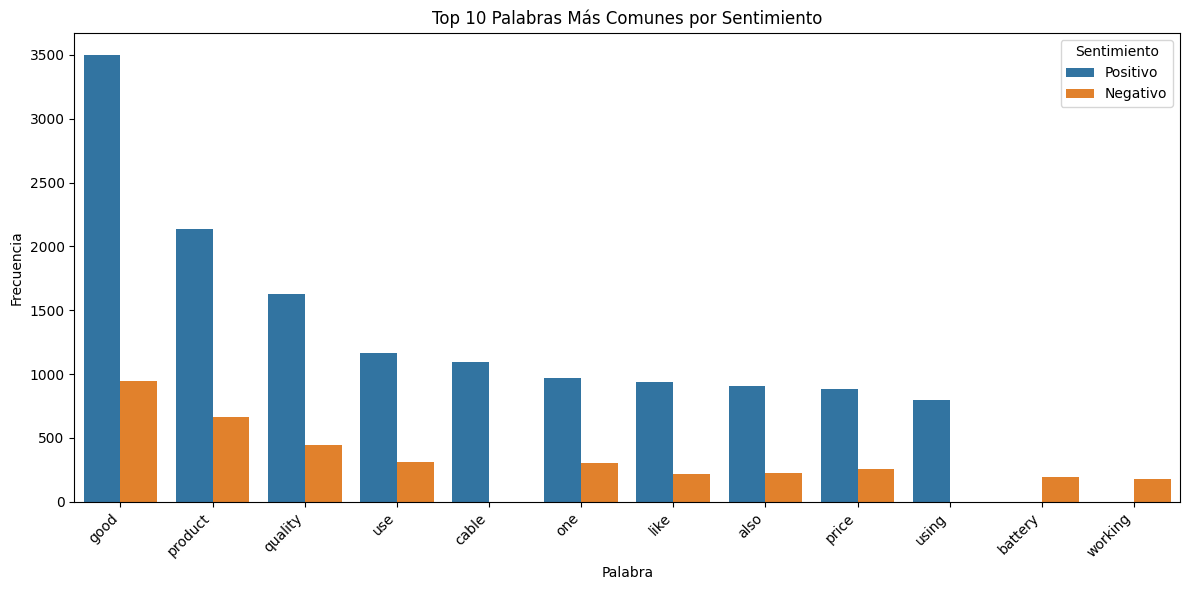

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Palabra', y='Frecuencia', hue='Sentimiento', data=df_top10)
plt.title('Top 10 Palabras Más Comunes por Sentimiento')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
from wordcloud import WordCloud

In [35]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

In [37]:
def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)

### 5. Clasificación Supervisada – Regresión Logística (25 pts)


*   Haga una regresion logistica de postive vs text
*   Muestre los resultados en una matriz de confusion



In [39]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['positive'], test_size=0.2, random_state=42)

In [40]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features=5000)),('clf', LogisticRegression())])

In [41]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', LogisticRegression())])

In [42]:
y_pred = pipeline.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.15      0.26        74
           1       0.78      1.00      0.87       219

    accuracy                           0.78       293
   macro avg       0.89      0.57      0.57       293
weighted avg       0.83      0.78      0.72       293



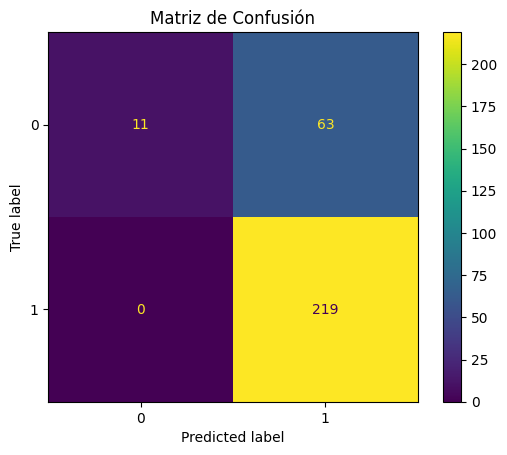

In [44]:
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.title('Matriz de Confusión')
plt.show()

### 6. Agrupamiento K-Means – No Supervisado (20 pts)


*   Cree una variable cluster usando un modelo de clustering

*   Como podria nombrar los clusters usando las otras variables



In [47]:
tfidf_vectorizer_kmeans = TfidfVectorizer(max_features=5000)
X_tfidf_kmeans = tfidf_vectorizer_kmeans.fit_transform(df['text'])

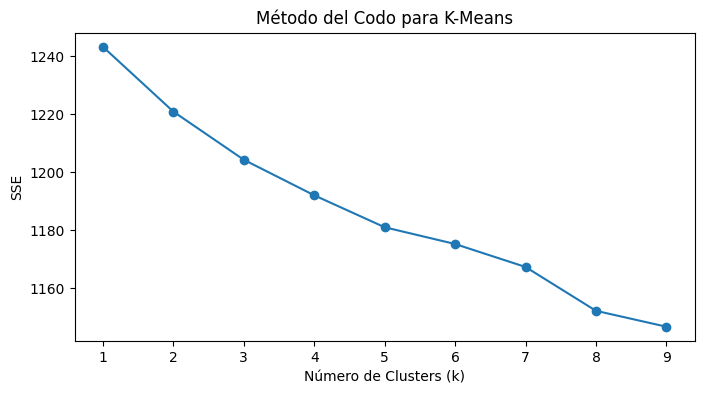

In [48]:
sse = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf_kmeans)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE')
plt.title('Método del Codo para K-Means')
plt.show()

In [55]:
n_clusters = 3
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans_model.fit_predict(X_tfidf_kmeans)

In [56]:
display(df.head())

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,text,positive,cluster
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Looks durable Charging is fine tooNo complains...,1,2
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,I ordered this cable to connect my phone to An...,1,2
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Not quite durable and sturdy,https://m.media-a...",0,0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,long wire,Charges good,Nice,I bou...",1,2
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,"Bought this instead of original apple, does th...",1,2


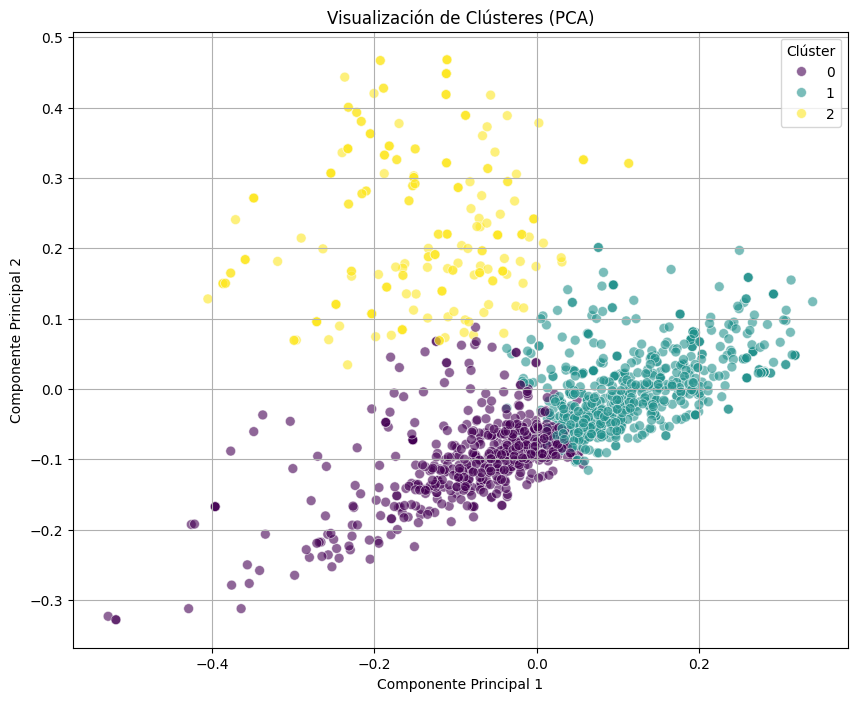

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf_kmeans)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis', s=50, alpha=0.6)
plt.title('Visualización de Clústeres (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

### 7. Insight & Recomendaciones (15 pts)
Escribe tu análisis aquí:

TODO: Relaciona errores del modelo con los clusters y propone acciones de negocio.

**ANÁLISIS**

A partir de la matriz de confusión de la regresión logística, observamos que el modelo tiene una alta precisión y recall para la clase positiva (1), lo que significa que identifica correctamente la mayoría de las reseñas positivas. Sin embargo, el recall para la clase negativa (0) es bastante bajo (0.15), lo que indica que el modelo tiene dificultades para identificar correctamente las reseñas negativas; muchos de los verdaderos negativos son clasificados erróneamente como positivos (Falsos Positivos).

**CLUSTER 0**

El Clúster 0 contiene muchas reseñas con palabras como "product", "good" y "quality", pero aún así presenta una proporción considerable de reseñas negativas (24%). Esto indica que el modelo de clasificación comete Falsos Positivos en este clúster, posiblemente porque las reseñas son ambiguas o tienen matices negativos que el modelo no detecta bien.

**CLUSTER 1**

 Este clúster parece tener una alta proporción de reseñas positivas (98% son 1, 2% son 0). Es probable que el modelo clasifique la mayoría de las reseñas en este clúster correctamente como positivas. Los errores en este clúster serían principalmente Falsos Negativos (reseñas positivas clasificadas como negativas), aunque dado el alto recall para la clase positiva, estos errores deberían ser menos frecuentes.

**CLUSTER 2**

Similar al Clúster 1, este clúster también muestra una alta proporción de reseñas positivas (94% son 1, 6% son 0). Aquí también, es probable que el modelo tenga un buen rendimiento.

**ACIONES DE NEGOCIO**

Los Clústeres 1 y 2, que agrupan reseñas mayoritariamente positivas, pueden ser aprovechados estratégicamente. Por un lado, permiten identificar reseñas destacadas que podrían usarse en las páginas de producto o en campañas de marketing para reforzar la percepción positiva. Por otro lado, el análisis de las características de los productos asociados a estos clústeres —como la categoría o el nivel de descuento— puede ayudar a entender qué factores están impulsando la satisfacción del cliente, ofreciendo así información valiosa para replicar esas condiciones en otros productos o segmentos.

Para mejorar la clasificación de reseñas en el Clúster 0, donde el modelo presenta dificultades, se pueden implementar varias acciones. Una opción es aplicar un análisis de sentimiento más granular mediante modelos avanzados o incluso entrenar un modelo específico para este clúster, con el fin de captar mejor los matices negativos que se ocultan tras palabras aparentemente positivas. Además, incorporar características adicionales como la longitud del texto, el uso de mayúsculas, signos de puntuación particulares o datos del producto (como categoría o porcentaje de descuento) podría ayudar a distinguir mejor las reseñas ambiguas. Finalmente, se recomienda priorizar la revisión manual de las reseñas clasificadas como Falsos Positivos dentro de este clúster, lo que permitiría detectar problemas reales que el modelo no logra identificar.

Analizar en detalle las reseñas dentro del Clúster 0 que fueron clasificadas erróneamente. ¿Hay temas comunes o quejas recurrentes en estas reseñas? Esta información es invaluable para identificar áreas específicas de productos o servicios que necesitan mejora.